In [88]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

In [3]:
#Data set downloaded from https://www.kaggle.com/datasets/nidzsharma/world-arms
data = pd.read_csv("arms_sales.csv",encoding = "ISO-8859-1")
data

,Rank (2021),Rank (2020),Company,Country,Arms Sales (2021),Arms sales (2020),Total Sales (2021),Arms sales as a % of total sales (2021),Arms sales 2020 (constant 2021 prices)
0,1,1,Lockheed Martin Corp.,United States,60340,58210,67044,90,60704
1,2,2,Raytheon Technologies,United States,41850,36780,64388,65,38356
2,3,3,Boeing,United States,33420,32740,62286,54,34143
3,4,4,Northrop Grumman Corp.,United States,29880,30420,35667,84,31723
4,5,5,General Dynamics Corp.,United States,26390,25840,38469,69,26947
...,...,...,...,...,...,...,...,...,...
95,96,93,Howmet Aerospace,United States,950,1020,4972,19,1064
96,97,97,Austal,Australia,940,920,1074,87,1029
97,98,105,Ultra Electronics Group,United Kingdom,920,830,1170,79,908
98,99,109,Diehl,Germany,870,750,3745,23,800


In [5]:
#checking for NA values in the data
data.isnull().sum()

Rank (2021)                                0
Rank (2020)                                0
Company                                    0
Country                                    0
Arms Sales (2021)                          0
Arms sales (2020)                          0
Total Sales (2021)                         0
Arms sales as a % of total sales (2021)    0
Arms sales 2020 (constant 2021 prices)     0
dtype: int64

In [6]:
#checking for problems with the column names
data.columns

Index(['Rank (2021) ', 'Rank (2020)', 'Company ', 'Country ',
       'Arms Sales (2021)', 'Arms sales (2020)', 'Total Sales (2021)',
       'Arms sales as a % of total sales (2021)',
       'Arms sales 2020 (constant 2021 prices)'],
      dtype='object')

In [7]:
#removing white spaces after column names
data.columns = data.columns.str.rstrip()

In [15]:
data.dtypes

Rank (2021)                                 int64
Rank (2020)                                object
Company                                    object
Country                                    object
Arms Sales (2021)                           int64
Arms sales (2020)                           int64
Total Sales (2021)                          int32
Arms sales as a % of total sales (2021)     int32
Arms sales 2020 (constant 2021 prices)      int64
dtype: object

In [16]:
#looking at problematic line causing 'Total Sales(2021)' and 'Arms sales as a % of total sales(2021)' to be formatted as objects instead of int
data[data["Total Sales (2021)"]==". ."]

,Rank (2021),Rank (2020),Company,Country,Arms Sales (2021),Arms sales (2020),Total Sales (2021),Arms sales as a % of total sales (2021),Arms sales 2020 (constant 2021 prices)


In [17]:
#changing .. to 0
data.iat[48, 6] = 0
data.iat[48, 7] = 0

In [18]:
#converting column data type to int
data["Total Sales (2021)"] = data["Total Sales (2021)"].astype(int)
data["Arms sales as a % of total sales (2021)"] = data["Arms sales as a % of total sales (2021)"].astype(int)

In [19]:
#total arms sales of top 100
data['Arms Sales (2021)'].agg("sum")

592060

In [20]:
#number of companies per coutry(region)
data.groupby('Country')['Company'].agg("count").sort_values(ascending=False)

Country
United States      40
United Kingdom      8
China               8
Russia              6
France              5
Germany             4
Japan               4
South Korea         4
Trans-European      3
Israel              3
Italy               2
India               2
Türkiye             2
Norway              1
Poland              1
Canada              1
Singapore           1
Spain               1
Sweden              1
Taiwan              1
Ukraine             1
Australia           1
Name: Company, dtype: int64

In [21]:
#looking at sum of arms sales per country(region)
sumpercountry = data.groupby('Country')['Arms Sales (2021)'].agg("sum").sort_values(ascending=True).to_frame()
sumpercountry = sumpercountry.reset_index()
sumpercountry

,Country,Arms Sales (2021)
0,Australia,940
1,Spain,1080
2,Norway,1170
3,Canada,1280
4,Ukraine,1330
5,Poland,1430
6,Taiwan,1970
7,Singapore,2160
8,Türkiye,3360
9,Sweden,4090


In [22]:
#only showing top 9 countries combining the others to one data point
sumpercountry.iloc[12] = sumpercountry.iloc[:13].sum()
sumpercountry = sumpercountry.iloc[12:].copy()
sumpercountry.iloc[0,0] = "Others"
sumpercountry

,Country,Arms Sales (2021)
12,Others,40150
13,Germany,9320
14,Israel,11630
15,Italy,16850
16,Russia,17770
17,Trans-European,18840
18,France,28750
19,United Kingdom,40430
20,China,109140
21,United States,299180


In [23]:
sumpercountry['Arms Sales (2021)'].agg("sum")

592060

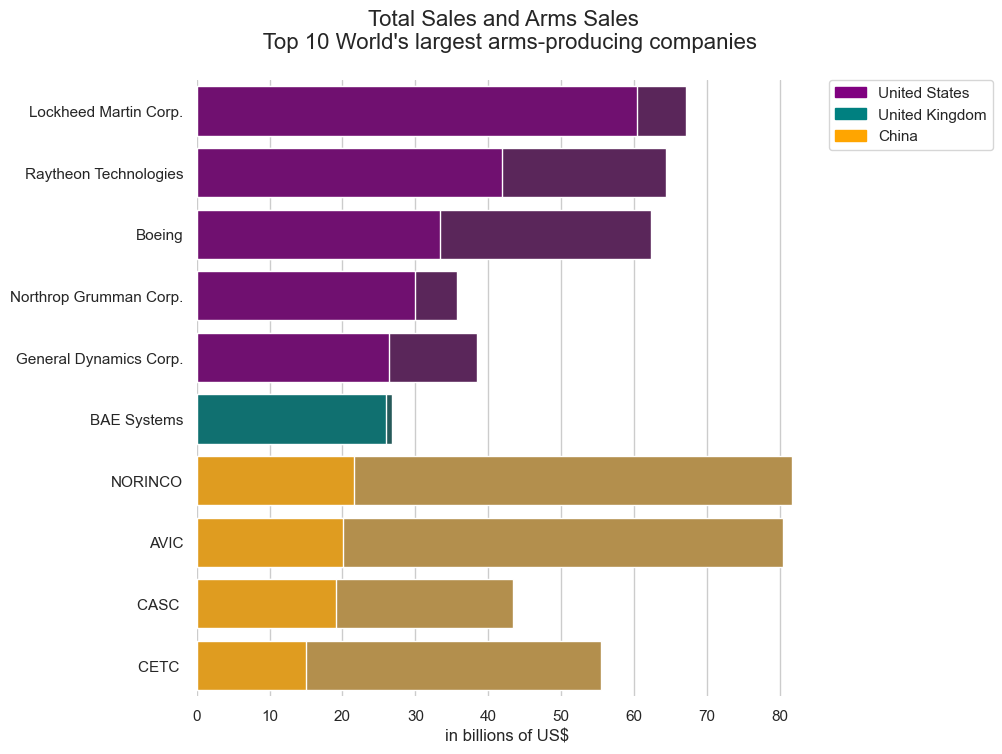

In [24]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 8))

map_country_color = {"United States": "#800080", "United Kingdom": "#008080", "China":"#FFA500"}
colors = data[:10].Country.replace(map_country_color).to_list()

sns.barplot(x="Total Sales (2021)", y="Company", data=data[:10], label="Total Sales", palette=colors,saturation=0.4)

sns.barplot(x="Arms Sales (2021)", y="Company", data=data[:10], label="Arms Sales", palette=colors)

legend_handles = [mpatches.Patch(color=color, label=country)
                  for country, color in map_country_color.items()]

ax.legend(handles=legend_handles, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_title("Total Sales and Arms Sales \n Top 10 World's largest arms-producing companies\n",fontsize=16)
ax.set(xlim=(0, 85000), ylabel="",xlabel="in billions of US$")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000)))

sns.despine(left=True, bottom=True)

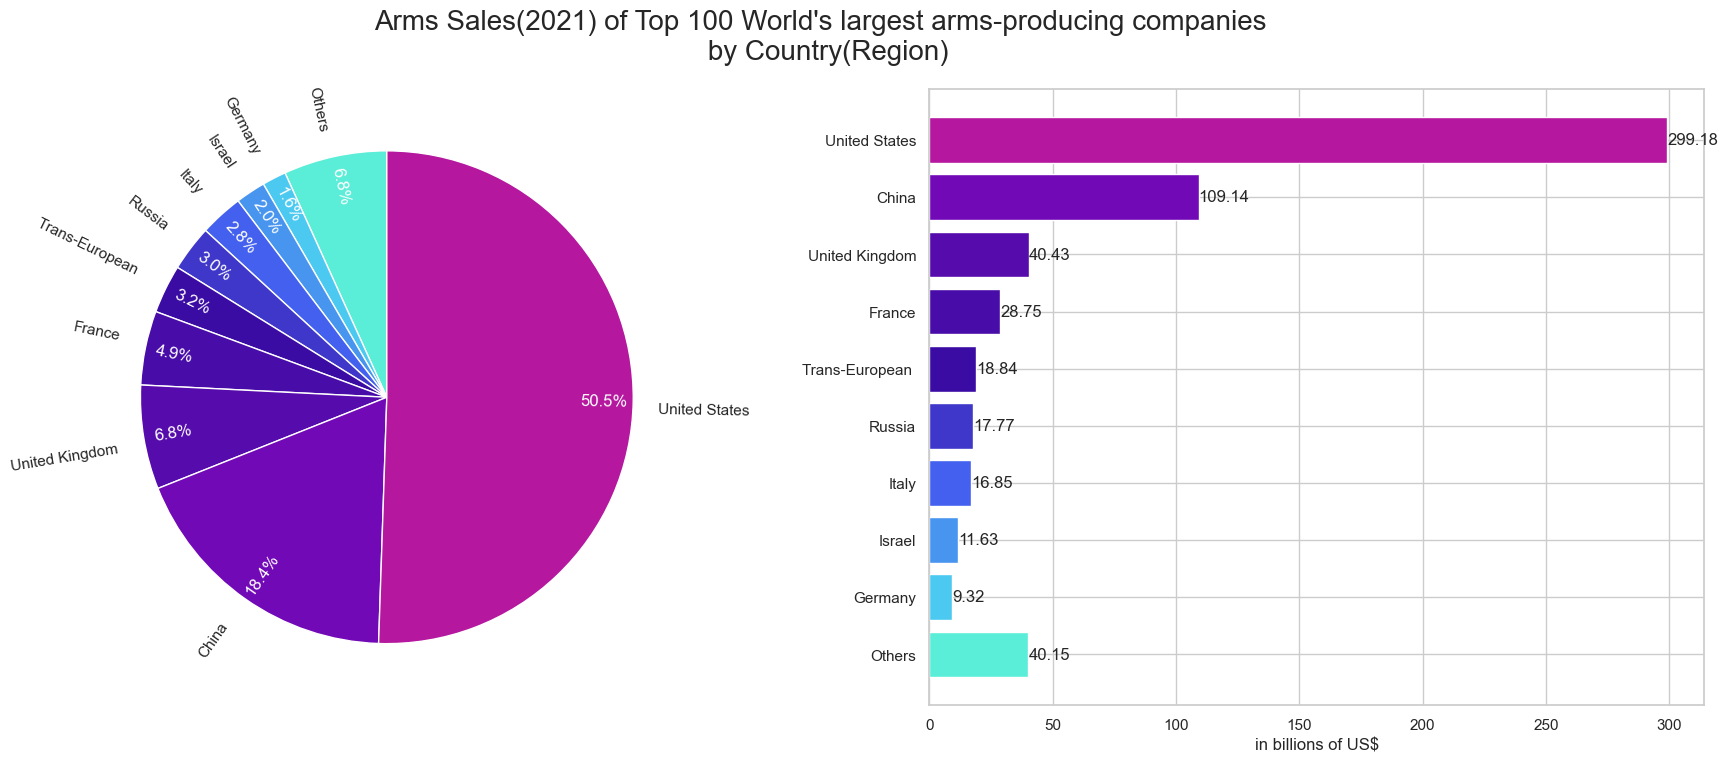

In [26]:
colors1=["#B5179E","#7209B7","#560BAD","#480CA8","#3A0CA3","#3F37C9","#4361EE","#4895EF","#4CC9F0","#5AEDD7"]
colors2=colors1[::-1]

f, ax = plt.subplots(1,2,figsize=(22, 8))

patches, labels, pct_texts = ax[0].pie(sumpercountry["Arms Sales (2021)"], labels=sumpercountry.Country,startangle = 90,
                                       rotatelabels=True, colors=colors2, autopct='%1.1f%%', pctdistance=0.88);

for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
    pct_text.set_color('white')

bars = ax[1].barh(width=sumpercountry["Arms Sales (2021)"],y=sumpercountry.Country,color=colors2)
bar_labels = [f'{x/1000:,.2f}' for x in bars.datavalues]
ax[1].bar_label(bars, labels=bar_labels)
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000)))
ax[1].set_xlabel("in billions of US$")

f.suptitle("Arms Sales(2021) of Top 100 World's largest arms-producing companies \n by Country(Region)\n\n", fontsize=20);

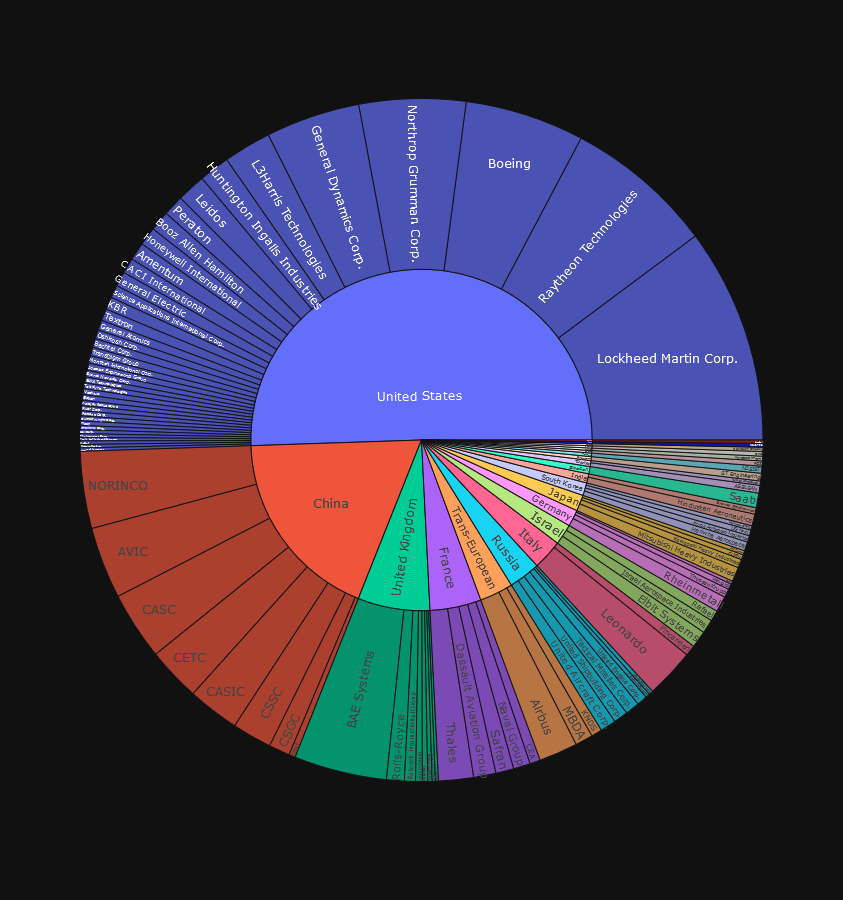

In [97]:
fig = px.sunburst(data,
                  path=['Country','Company'],
                  values='Arms Sales (2021)',
                  template='plotly_dark',
                  hover_data=['Arms Sales (2021)','Rank (2021)'],
                  width=800,
                  height=900,
                 )
fig